In [1]:
import os

path = './data/ml_dogcat/train/'
os.listdir(path)

['dog.1487.jpg',
 'cat.2123.jpg',
 'cat.8962.jpg',
 'dog.10071.jpg',
 'cat.8142.jpg',
 'dog.11016.jpg',
 'cat.10007.jpg',
 'dog.3361.jpg',
 'cat.11585.jpg',
 'dog.4690.jpg',
 'cat.10087.jpg',
 'dog.3781.jpg',
 'dog.1315.jpg',
 'cat.9351.jpg',
 'dog.1159.jpg',
 'cat.1857.jpg',
 'dog.8546.jpg',
 'cat.3369.jpg',
 'dog.4351.jpg',
 'dog.11807.jpg',
 'cat.10097.jpg',
 'cat.3384.jpg',
 'cat.11740.jpg',
 'cat.4955.jpg',
 'cat.4393.jpg',
 'dog.10742.jpg',
 'cat.3607.jpg',
 'dog.3983.jpg',
 'cat.2956.jpg',
 'cat.3867.jpg',
 'cat.7630.jpg',
 'cat.12411.jpg',
 'dog.11152.jpg',
 'dog.5339.jpg',
 'dog.10797.jpg',
 'dog.1903.jpg',
 'dog.10668.jpg',
 'dog.2005.jpg',
 'dog.3898.jpg',
 'cat.10517.jpg',
 'cat.9798.jpg',
 'dog.8667.jpg',
 'cat.8746.jpg',
 'cat.1834.jpg',
 'cat.297.jpg',
 'cat.5809.jpg',
 'cat.6362.jpg',
 'dog.3562.jpg',
 'cat.363.jpg',
 'cat.8458.jpg',
 'dog.2699.jpg',
 'cat.8358.jpg',
 'dog.3415.jpg',
 'dog.11964.jpg',
 'cat.6180.jpg',
 'cat.3401.jpg',
 'cat.1903.jpg',
 'cat.8940.jpg',
 

In [15]:
import random

full_names = os.listdir(path)
full_names = random.choices(full_names, k=10000)
full_names

['cat.6709.jpg',
 'dog.4660.jpg',
 'dog.6838.jpg',
 'dog.6513.jpg',
 'cat.443.jpg',
 'cat.10584.jpg',
 'cat.3461.jpg',
 'cat.1052.jpg',
 'dog.252.jpg',
 'dog.589.jpg',
 'dog.8093.jpg',
 'dog.2676.jpg',
 'cat.2980.jpg',
 'dog.612.jpg',
 'dog.2401.jpg',
 'dog.11547.jpg',
 'cat.305.jpg',
 'dog.2011.jpg',
 'dog.2914.jpg',
 'cat.11208.jpg',
 'dog.9244.jpg',
 'cat.3836.jpg',
 'dog.1669.jpg',
 'dog.12277.jpg',
 'dog.7753.jpg',
 'dog.3038.jpg',
 'cat.1127.jpg',
 'cat.265.jpg',
 'cat.6474.jpg',
 'dog.10867.jpg',
 'cat.10536.jpg',
 'dog.8565.jpg',
 'dog.247.jpg',
 'cat.1614.jpg',
 'dog.11088.jpg',
 'cat.10959.jpg',
 'dog.6629.jpg',
 'cat.10763.jpg',
 'cat.759.jpg',
 'dog.7567.jpg',
 'dog.9484.jpg',
 'cat.6276.jpg',
 'cat.11767.jpg',
 'dog.6007.jpg',
 'cat.7777.jpg',
 'dog.12080.jpg',
 'dog.10663.jpg',
 'dog.1804.jpg',
 'cat.11535.jpg',
 'cat.12061.jpg',
 'cat.8086.jpg',
 'dog.2766.jpg',
 'cat.9269.jpg',
 'cat.12104.jpg',
 'dog.2074.jpg',
 'dog.8230.jpg',
 'dog.10311.jpg',
 'cat.8060.jpg',
 'dog.

In [2]:
## 파일명에서 label 추출하기

os.listdir(path)[0].split('.')

['dog', '1487', 'jpg']

In [16]:
# full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [17]:
set(labels)

{'cat', 'dog'}

In [18]:
## 분포 확인

from collections import Counter

print(Counter(labels).keys())
print(Counter(labels).values())

dict_keys(['cat', 'dog'])
dict_values([5044, 4956])


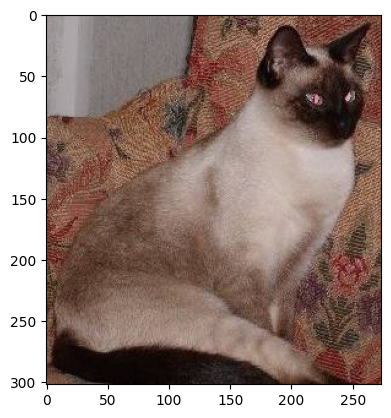

In [19]:
## 어떤 데이터인지 확인

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [20]:
## 사진의 크기들이 서로 다르다

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(500, 356, 3)

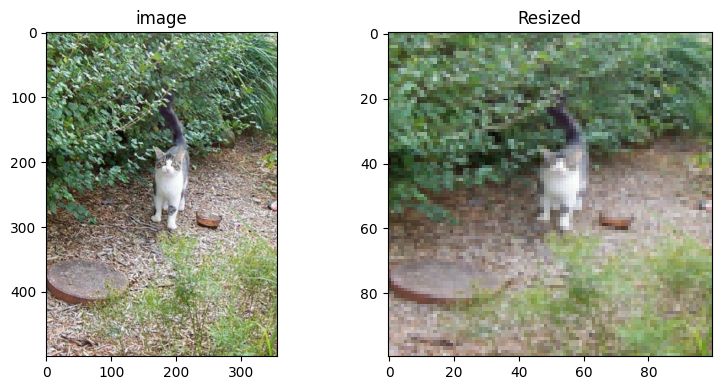

In [21]:
## 머신러닝 작업을 위해 이미지의 크기를 통일화하여야 한다!!

from skimage.transform import resize
resized = resize(image, (100, 100, 3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [22]:
## RGB 데이터 Flat 하게 만들기

resized.shape

(100, 100, 3)

In [23]:
resized.reshape(100*100*3,)

array([0.42971386, 0.57168208, 0.4717445 , ..., 0.50917011, 0.57347909,
       0.34692601])

In [24]:
# 위 처ㅓ럼 데이터를 다시 만들자!!

images = []
for file in full_names[:3]:
    image = mpimg.imread(path + sample)
    resized = resize(image, (100, 100, 3))
    images.append(resized.reshape(100*100*3, ))

In [25]:
len(images), images[0].shape

(3, (30000,))

In [26]:
## 이제 전체 데이터에 도전해보자!!

import numpy as np

np.array(images).shape

(3, 30000)

In [27]:
from tqdm.notebook import tqdm
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    resized = resize(image, (100, 100, 3))
    images.append(resized.reshape(100*100*3, ))
    
images = np.array(images)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [28]:
images.shape

(10000, 30000)

In [29]:
labels[:3]

['cat', 'dog', 'dog']

In [30]:
images[:3]

array([[5.70998699e-02, 6.10214385e-02, 2.96488895e-02, ...,
        7.84351500e-03, 7.84351500e-03, 3.87376837e-07],
       [3.18630899e-01, 2.91179918e-01, 3.22552467e-01, ...,
        7.04058155e-01, 6.71473538e-01, 7.12254237e-01],
       [3.51176593e-01, 4.19987217e-01, 1.62663777e-01, ...,
        4.39776159e-01, 4.66964377e-01, 2.22456116e-01]])

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 1, 1]), array(['cat', 'dog'], dtype='<U3'))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(images, labels_encoded, test_size = 0.2,
                        random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((8000, 30000), (2000, 30000))

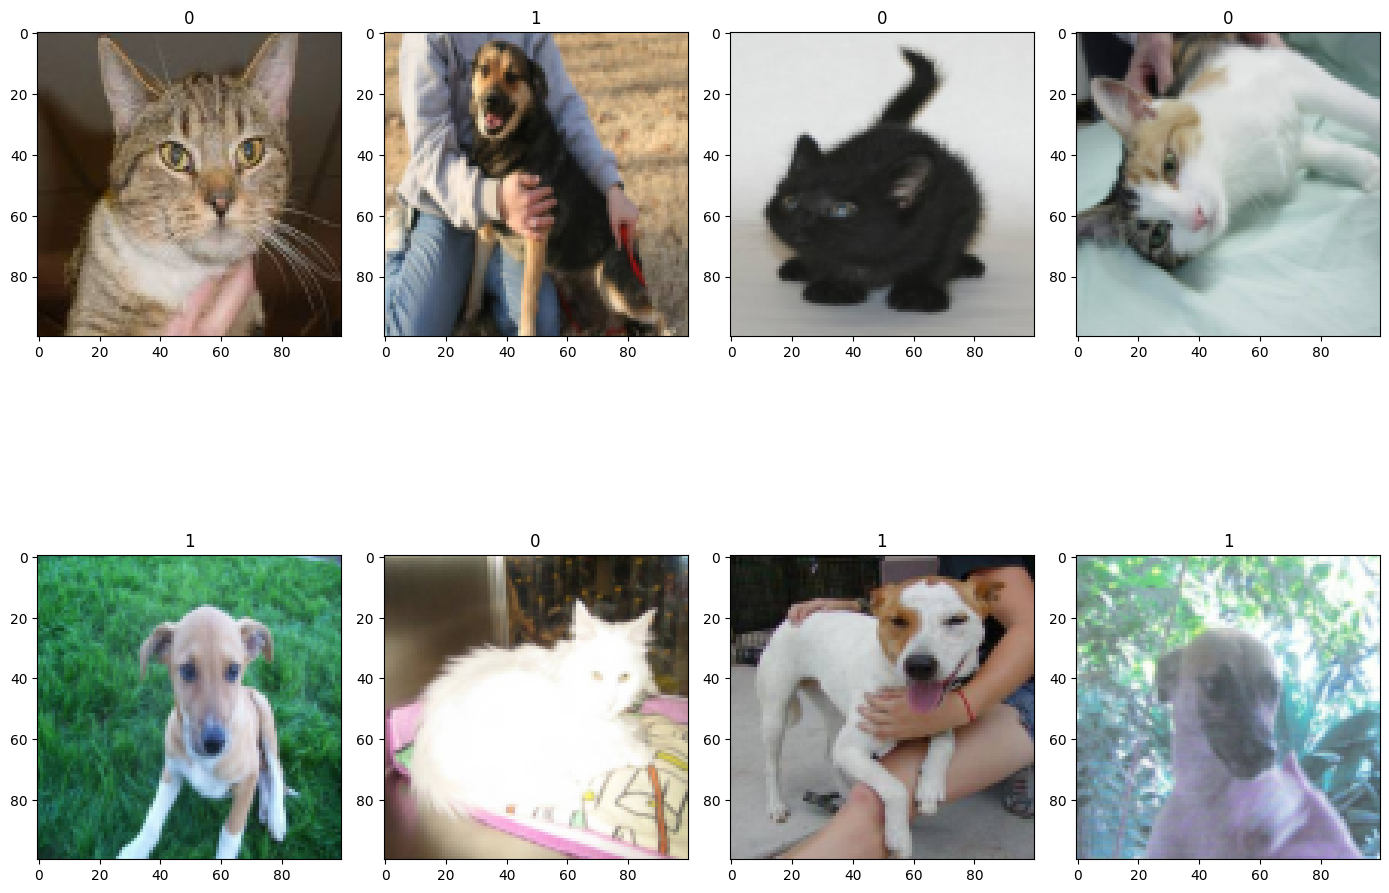

In [34]:
## 어떤 데이터가 있는지 확인

samples = random.choices(population=range(0, 2000), k=8)

plt.figure(figsize = (14, 12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n].reshape(100, 100, 3), cmap='Greys',
              interpolation='nearest')
    plt.title(y_train[n])
    
plt.tight_layout()
plt.show()

In [41]:
## 몇개의 함수 가져오고

from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

In [42]:
import pandas as pd

def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_'+str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns=cols)

In [43]:
def print_variance_ratio(pca, only_sum=False):
    if only_sum==False:
        print('variacne_ratio: ',pca.explained_variance_ratio_)
    print('sum of variance_ratio:', np.sum(pca.explained_variance_ratio_))

In [44]:
## 만개의 특성을 100개만 사용하겠다
import time

start_time = time.time()
pca_data, pca = get_pca_data(X_train, n_components=100)
print_variance_ratio(pca, only_sum=True)
print('Fit time :', time.time() - start_time)

sum of variance_ratio: 0.8418933722156114
Fit time : 17.782246589660645


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


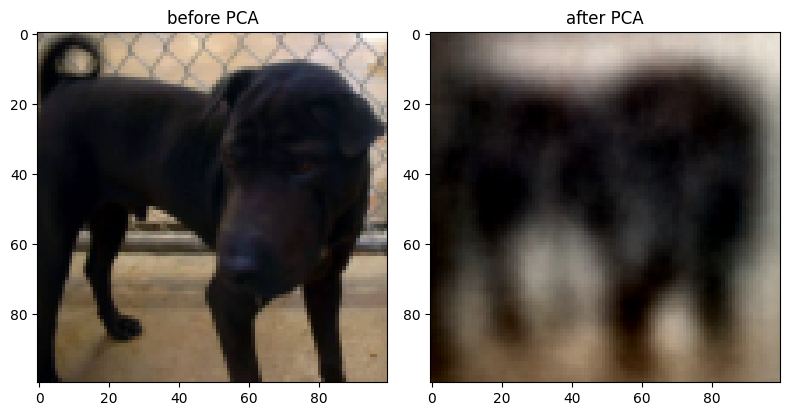

In [45]:
## PCA로 바뀐 그림은 어떻게 생겼을까??

n = 100

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(X_train[n].reshape(100, 100, 3))
ax[0].set_title("before PCA")
ax[1].imshow(pca.inverse_transform(pca_data[n]).reshape(100, 100, 3))
ax[1].set_title("after PCA")

fig.tight_layout()
plt.show()

In [46]:
## 이왕 하는 김에 조금 더 해보자!!

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(pca_data, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [47]:
from sklearn.metrics import accuracy_score

pred = lr_clf.predict(pca.transform(X_test))
accuracy_score(y_test, pred)

0.5965

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(pca_data, y_train)

pred = rf_clf.predict(pca.transform(X_test))
accuracy_score(y_test, pred)

0.7085